In [40]:
import pandas as pd

In [41]:
df = pd.read_csv(r"C:\Users\Rafael Pietro\OneDrive\Cursos\DNC\Datasets\Modelos Supervisionados\Classificação\breast_cancer.csv")

In [42]:
df.head(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target,target_name
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant


In [43]:
X = df.drop(columns=["target", "target_name"])
Y = df[["target"]]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf = RandomForestClassifier()

In [48]:
clf.fit(X_train, y_train)

C:\Users\RAFAEL~1\AppData\Local\Temp/ipykernel_5456/2395142735.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [49]:
y_pred = clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [51]:
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100:.3f}%")
print(f"Precision: {precision_score(y_test, y_pred)*100:.3f}%")
print(f"Recall: {recall_score(y_test, y_pred)*100:.3f}%")
print(f"F1: {f1_score(y_test, y_pred)*100:.3f}%")

Acccuracy: 97.368%
Precision: 98.529%
Recall: 97.101%
F1: 97.810%


In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.99      0.97      0.98        69

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [54]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

c:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


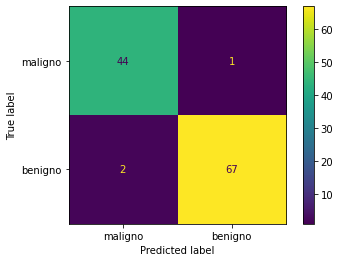

In [55]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=["maligno", "benigno"], values_format='d')
plt.grid(False)
plt.show()

In [56]:
from sklearn.metrics import plot_roc_curve

c:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


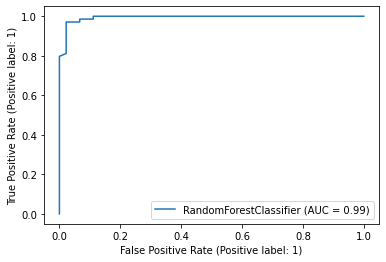

In [57]:
plot_roc_curve(clf, X_test, y_test)
plt.show()